In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,age,sex,vax,hyper_t,obesity,diabetes,lung_d,cardio_v,neuro_l,renal,immuno_comp,blood_d,hospitalized
0,82,M,1,4,3,2,1,1,0,4,3,0,True
1,30,F,1,1,2,0,1,2,0,3,1,0,False
2,87,F,1,3,1,0,2,1,0,0,3,0,True
3,73,M,1,4,5,2,0,1,0,3,1,0,True
4,35,M,1,4,4,1,3,2,0,2,0,0,False


<h2> Data Visualisation

<AxesSubplot:xlabel='hospitalized', ylabel='count'>

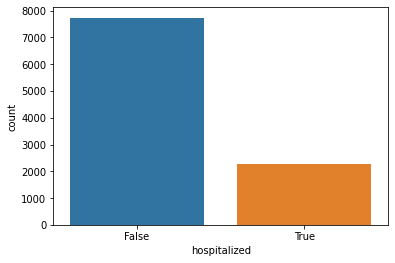

In [4]:
sns.countplot(data=df, x='hospitalized')

<AxesSubplot:xlabel='age', ylabel='Count'>

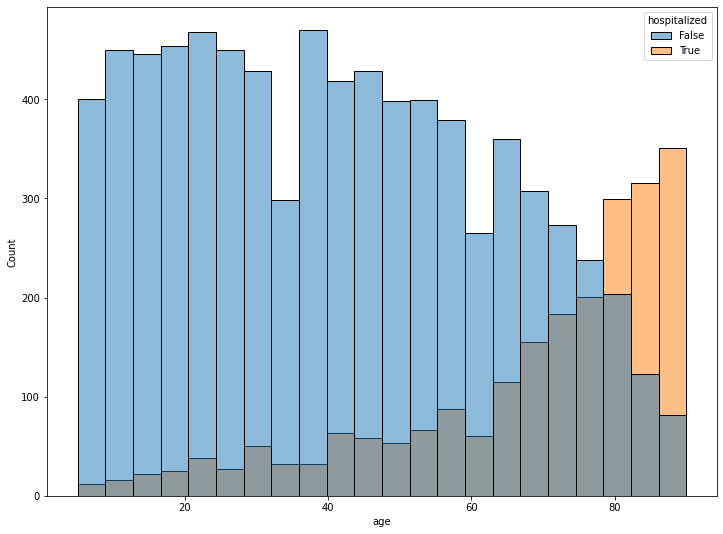

In [5]:
plt.figure(figsize=(12,9))
sns.histplot(data=df, x='age', hue='hospitalized')

In [6]:
ageW = 25
sexW = 3
vaxW = 10
hyper_tW = 18
obesityW = 8
diabetesW = 8
lung_dW = 6
cardio_vW = 5
neuro_lW = 2
renalW = 2
immuno_compW = 11
blood_dW = 2
ageW+sexW+vaxW+hyper_tW+obesityW+diabetesW+lung_dW+cardio_vW+neuro_lW+renalW+immuno_compW+blood_dW

100

<AxesSubplot:xlabel='vax', ylabel='Count'>

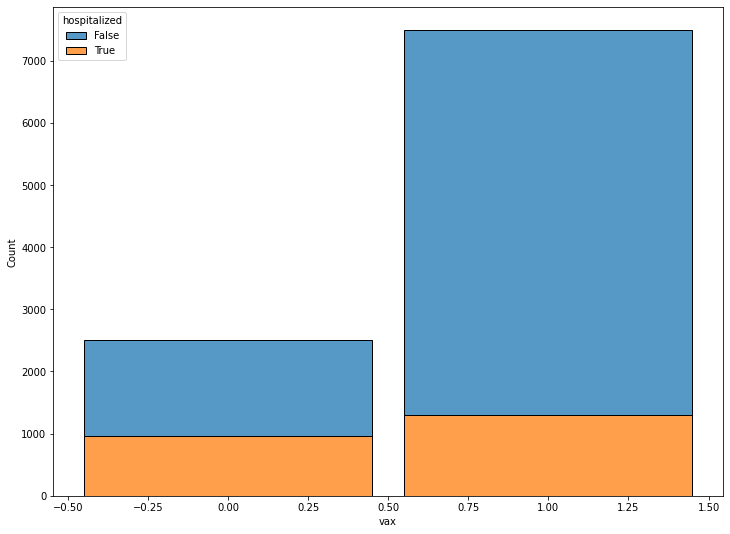

In [7]:
plt.figure(figsize=(12,9))
sns.histplot(data=df, x='vax', hue='hospitalized', discrete=True,  multiple="stack", shrink=.9)

<AxesSubplot:>

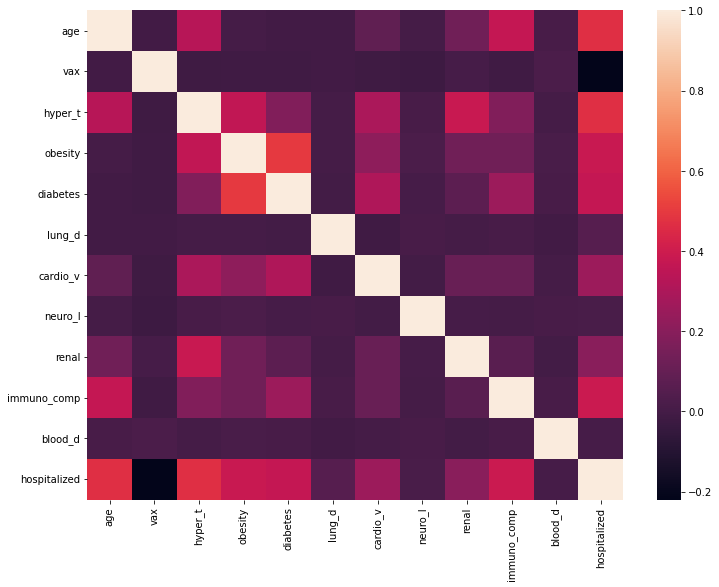

In [8]:
plt.figure(figsize=(12,9))
sns.heatmap(data=df.corr())

<h2> Data Preprocessing

In [9]:
# Map label to int
df['hospitalized'] = df['hospitalized'].astype(int)

In [10]:
#Get dummies
df = pd.get_dummies(df, drop_first=True)
df

,age,vax,hyper_t,obesity,diabetes,lung_d,cardio_v,neuro_l,renal,immuno_comp,blood_d,hospitalized,sex_M
0,82,1,4,3,2,1,1,0,4,3,0,1,1
1,30,1,1,2,0,1,2,0,3,1,0,0,0
2,87,1,3,1,0,2,1,0,0,3,0,1,0
3,73,1,4,5,2,0,1,0,3,1,0,1,1
4,35,1,4,4,1,3,2,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,52,1,1,1,0,2,1,0,2,0,0,0,0
9996,26,1,1,1,1,0,0,0,0,2,0,0,1
9997,56,1,2,1,0,0,2,0,1,2,0,0,0
9998,34,1,2,4,3,2,4,1,1,2,0,0,0


In [11]:
y = df['hospitalized']
X = df.drop('hospitalized', axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [16]:
gb_model = GradientBoostingClassifier()

In [17]:
grid = GridSearchCV(gb_model,param_grid)

In [18]:
grid.fit(X_train,y_train)
filename = 'personal_model.pkl'
pickle.dump(grid, open(filename, 'wb'))

In [19]:
grid.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [20]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [21]:
predictions = grid.predict(X_test)
# predictions = grid.predict_proba(X_test)
# predictions = (grid.predict_proba(X_test)[:,1] >= 0.25).astype(bool)
# predictions

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1551
           1       0.96      0.93      0.94       449

    accuracy                           0.98      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.98      0.98      0.98      2000



c:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


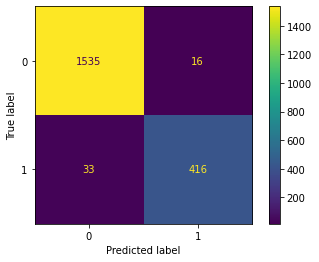

In [23]:
plot_confusion_matrix(grid, X_test, y_test)

<AxesSubplot:>

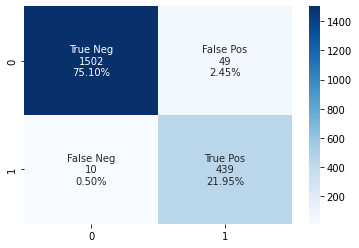

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
predictions = (grid.predict_proba(X_test)[:,1] >= 0.27).astype(bool)
cf_matrix = confusion_matrix(y_test,predictions)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Reference: ROC AUC=0.500
Gradient Boosting Classifier: ROC AUC=0.997


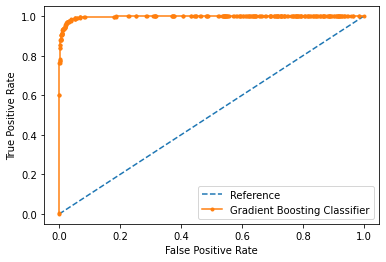

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_probs = grid.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Reference: ROC AUC=%.3f' % (ns_auc))
print('Gradient Boosting Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Reference')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Gradient Boosting Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [26]:
feat_import = grid.best_estimator_.feature_importances_

In [27]:
imp_feats = pd.DataFrame(index=X.columns,data=feat_import,columns=['Importance'])

In [33]:
imp_feats

,Importance
age,0.339984
vax,0.109834
hyper_t,0.149004
obesity,0.172191
diabetes,0.108833
lung_d,0.008590
cardio_v,0.008959
neuro_l,0.000819
renal,0.003335
immuno_comp,0.096336


In [29]:
patient = { 
    'age':75,
    'vax':0,
    'hyper_t':0,
    'obesity':0,
    'diabetes':0,
    'lung_d':0,
    'cardio_v':0,
    'neuro_l':0,
    'renal':0,
    'immuno_comp':0,
    'blood_d':0,
    'sex_M':0
}
# patient = X.iloc[16]
patient = pd.Series(patient)
df1 = pd.DataFrame(patient.values.reshape(1,-1))
predictions = grid.predict(df1)
print(predictions)
predictions = grid.predict_proba(df1)
# print(predictions)
print(str(round(predictions.item(1)*100,2)) + '%')

[0]
0.66%


c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
